In [1]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical, plot_model
from keras.metrics import F1Score 
from keras import models, layers
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from PIL import ImageFont
import visualkeras

# Data and Model

In [2]:
# Load the data
(train_images, train_labels), (test_images, test_labels) =  fashion_mnist.load_data()

In [3]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

In [4]:
# Create the model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [5]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[F1Score(average='weighted')])

In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5

938/938 [==============================] - 39s 36ms/step - loss: 0.5577 - f1_score: 0.7906
Epoch 2/5
938/938 [==============================] - 36s 38ms/step - loss: 0.3435 - f1_score: 0.8732
Epoch 3/5
938/938 [==============================] - 37s 39ms/step - loss: 0.2900 - f1_score: 0.8932
Epoch 4/5
938/938 [==============================] - 26s 28ms/step - loss: 0.2580 - f1_score: 0.9050
Epoch 5/5
938/938 [==============================] - 17s 18ms/step - loss: 0.2332 - f1_score: 0.9140


In [7]:
# Predict the test data
y_true = test_labels
y_pred = model.predict(test_images)

313/313 [==============================] - 2s 4ms/step


# Reporting

In [8]:
# Convert predicted values to integer labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to integer labels
y_true_int = np.argmax(y_true, axis=1)

# Calculate the classification report
report = classification_report(y_true_int, y_pred_classes, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8201    0.8800    0.8490      1000
           1     0.9919    0.9750    0.9834      1000
           2     0.8016    0.8930    0.8448      1000
           3     0.9073    0.9000    0.9036      1000
           4     0.8753    0.8070    0.8398      1000
           5     0.9878    0.9680    0.9778      1000
           6     0.7373    0.6680    0.7009      1000
           7     0.9737    0.9240    0.9482      1000
           8     0.9713    0.9820    0.9766      1000
           9     0.9206    0.9850    0.9517      1000

    accuracy                         0.8982     10000
   macro avg     0.8987    0.8982    0.8976     10000
weighted avg     0.8987    0.8982    0.8976     10000



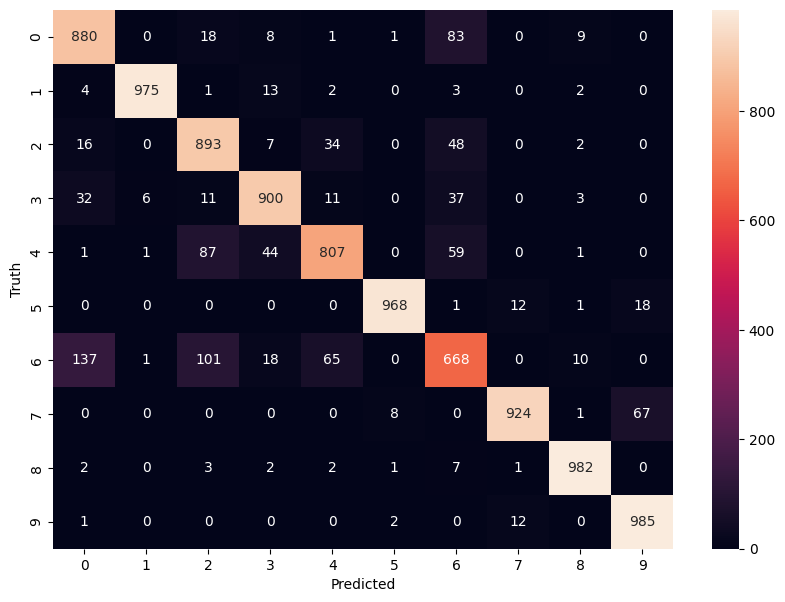

In [9]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_int, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [10]:
# Generate classification report as dictionary
report_dict = classification_report(y_true_int, y_pred_classes, digits=4, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the DataFrame to an Excel file
filename = 'cnn_fmnist_naiv'
report_df.to_excel(filename + '.xlsx', sheet_name=filename)

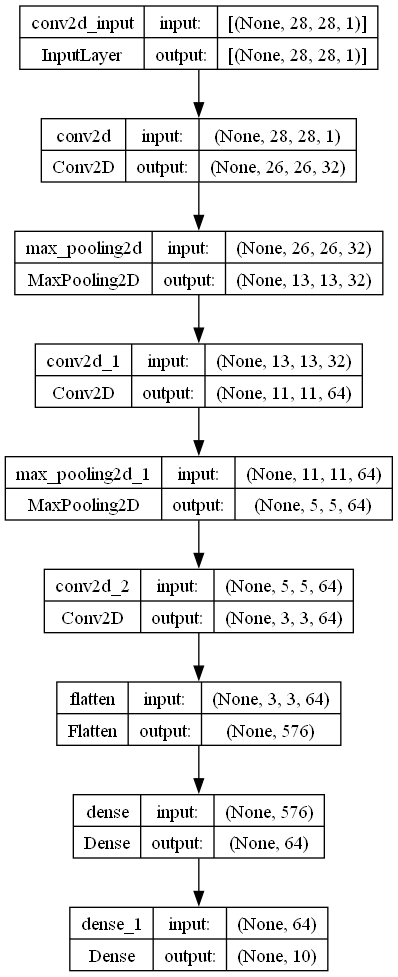

In [11]:
# Export model image with plot_model
plot_model(model, to_file=filename + '.png', show_shapes=True, show_layer_names=True)

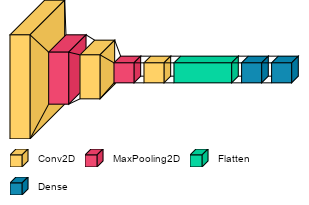

In [12]:
# Export model image with visualkeras
font = ImageFont.truetype("C:\\Windows\\Fonts\\Arial.ttf", 10)
visualkeras.layered_view(model, legend=True, font=font, to_file=filename + '.png')